## Dataset splitting randomly selection




In [54]:
# ============================================================
# Dataset Splitter for Brain Tumor Classification
# Random Split per Class:
#   - 50% Train
#   - 40% Test
#   - 10% Validation
# Files are COPIED (not moved or deleted)
# ============================================================

import os
import random
import shutil
from pathlib import Path

# -------------------- USER INPUT --------------------
SOURCE_DATASET_DIR = input(
    "Enter dataset path (contains 'Brain Tumor' and 'Healthy' folders):\n"
).strip()

OUTPUT_BASE_DIR = input(
    "Enter output path for split dataset:\n"
).strip()

# -------------------- CONFIG --------------------
TRAIN_RATIO = 0.5
TEST_RATIO = 0.4
VAL_RATIO = 0.1

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

CLASS_NAMES = ["Brain Tumor", "Healthy"]

# -------------------- VALIDATION --------------------
assert abs(TRAIN_RATIO + TEST_RATIO + VAL_RATIO - 1.0) < 1e-6, \
    "Ratios must sum to 1.0"

for cls in CLASS_NAMES:
    cls_path = os.path.join(SOURCE_DATASET_DIR, cls)
    if not os.path.isdir(cls_path):
        raise FileNotFoundError(f"Missing class folder: {cls_path}")

# -------------------- CREATE OUTPUT STRUCTURE --------------------
for split in ["train", "test", "val"]:
    for cls in CLASS_NAMES:
        os.makedirs(os.path.join(OUTPUT_BASE_DIR, split, cls), exist_ok=True)

# -------------------- SPLITTING FUNCTION --------------------
def split_and_copy_class(class_name):
    src_class_dir = os.path.join(SOURCE_DATASET_DIR, class_name)

    images = [
        f for f in os.listdir(src_class_dir)
        if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"))
    ]

    random.shuffle(images)

    total = len(images)
    n_train = int(total * TRAIN_RATIO)
    n_test = int(total * TEST_RATIO)
    n_val = total - n_train - n_test  # ensure full coverage

    train_imgs = images[:n_train]
    test_imgs = images[n_train:n_train + n_test]
    val_imgs = images[n_train + n_test:]

    splits = {
        "train": train_imgs,
        "test": test_imgs,
        "val": val_imgs
    }

    for split_name, split_images in splits.items():
        dst_dir = os.path.join(OUTPUT_BASE_DIR, split_name, class_name)

        for img_name in split_images:
            src = os.path.join(src_class_dir, img_name)
            dst = os.path.join(dst_dir, img_name)

            shutil.copy2(src, dst)  # COPY (metadata preserved)

    return n_train, n_test, n_val

# -------------------- RUN SPLIT --------------------
print("\nStarting dataset split...\n")

summary = {}

for cls in CLASS_NAMES:
    n_train, n_test, n_val = split_and_copy_class(cls)
    summary[cls] = (n_train, n_test, n_val)

# -------------------- SUMMARY --------------------
print("\n✅ Dataset split completed successfully!\n")

for cls, (n_train, n_test, n_val) in summary.items():
    total = n_train + n_test + n_val
    print(f"Class: {cls}")
    print(f"  Total images: {total}")
    print(f"  Train: {n_train}")
    print(f"  Test:  {n_test}")
    print(f"  Val:   {n_val}")
    print("-" * 40)

print("\nFinal folder structure:")
print(f"{OUTPUT_BASE_DIR}/")
print("├── train/")
print("│   ├── Brain Tumor/")
print("│   └── Healthy/")
print("├── test/")
print("│   ├── Brain Tumor/")
print("│   └── Healthy/")
print("└── val/")
print("    ├── Brain Tumor/")
print("    └── Healthy/")

# ============================================================
# End of Script
# ============================================================


Enter dataset path (contains 'Brain Tumor' and 'Healthy' folders):
/content/drive/MyDrive/DATASETS/Brain Tumor Data Set
Enter output path for split dataset:
/content/drive/MyDrive/DATASETS/brain-random-dataset

Starting dataset split...


✅ Dataset split completed successfully!

Class: Brain Tumor
  Total images: 2513
  Train: 1256
  Test:  1005
  Val:   252
----------------------------------------
Class: Healthy
  Total images: 2087
  Train: 1043
  Test:  834
  Val:   210
----------------------------------------

Final folder structure:
/content/drive/MyDrive/DATASETS/brain-random-dataset/
├── train/
│   ├── Brain Tumor/
│   └── Healthy/
├── test/
│   ├── Brain Tumor/
│   └── Healthy/
└── val/
    ├── Brain Tumor/
    └── Healthy/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2251 files belonging to 2 classes.
Found 456 files belonging to 2 classes.
Found 1807 files belonging to 2 classes.
Class names: ['Brain Tumor', 'Healthy']


Model: "xception_brain_tumor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.6842 - auc: 0.7362 - loss: 0.5914

71/71 ━━━━━━━━━━━━━━━━━━━━ 55s 594ms/step - accuracy: 0.6851 - auc: 0.7374 - loss: 0.5905 - val_accuracy: 0.8026 - val_auc: 0.9078 - val_loss: 0.4335
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.8111 - auc: 0.8967 - loss: 0.4189

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 596ms/step - accuracy: 0.8114 - auc: 0.8968 - loss: 0.4187 - val_accuracy: 0.8487 - val_auc: 0.9331 - val_loss: 0.3601
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.8620 - auc: 0.9341 - loss: 0.3495

71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 589ms/step - accuracy: 0.8619 - auc: 0.9340 - loss: 0.3497 - val_accuracy: 0.8772 - val_auc: 0.9445 - val_loss: 0.3283
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.8468 - auc: 0.9240 - loss: 0.3614

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 612ms/step - accuracy: 0.8469 - auc: 0.9241 - loss: 0.3612 - val_accuracy: 0.8728 - val_auc: 0.9510 - val_loss: 0.3093
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.8692 - auc: 0.9436 - loss: 0.3171

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 612ms/step - accuracy: 0.8692 - auc: 0.9437 - loss: 0.3171 - val_accuracy: 0.8860 - val_auc: 0.9538 - val_loss: 0.2951
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 587ms/step - accuracy: 0.8792 - auc: 0.9494 - loss: 0.3027 - val_accuracy: 0.8618 - val_auc: 0.9567 - val_loss: 0.3053
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.8862 - auc: 0.9513 - loss: 0.2963

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 608ms/step - accuracy: 0.8862 - auc: 0.9513 - loss: 0.2963 - val_accuracy: 0.8947 - val_auc: 0.9620 - val_loss: 0.2721
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.8899 - auc: 0.9475 - loss: 0.2985

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 613ms/step - accuracy: 0.8899 - auc: 0.9475 - loss: 0.2984 - val_accuracy: 0.9035 - val_auc: 0.9652 - val_loss: 0.2611
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.8906 - auc: 0.9520 - loss: 0.2887

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 614ms/step - accuracy: 0.8905 - auc: 0.9520 - loss: 0.2886 - val_accuracy: 0.9079 - val_auc: 0.9664 - val_loss: 0.2569
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.9118 - auc: 0.9646 - loss: 0.2591

71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 603ms/step - accuracy: 0.9116 - auc: 0.9646 - loss: 0.2592 - val_accuracy: 0.9013 - val_auc: 0.9667 - val_loss: 0.2520
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.8955 - auc: 0.9536 - loss: 0.2783

71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 596ms/step - accuracy: 0.8956 - auc: 0.9536 - loss: 0.2782 - val_accuracy: 0.9013 - val_auc: 0.9672 - val_loss: 0.2489
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9114 - auc: 0.9701 - loss: 0.2371

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 599ms/step - accuracy: 0.9114 - auc: 0.9701 - loss: 0.2372 - val_accuracy: 0.9035 - val_auc: 0.9683 - val_loss: 0.2424
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.8970 - auc: 0.9587 - loss: 0.2633

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 599ms/step - accuracy: 0.8971 - auc: 0.9588 - loss: 0.2632 - val_accuracy: 0.9013 - val_auc: 0.9687 - val_loss: 0.2420
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 573ms/step - accuracy: 0.8869 - auc: 0.9557 - loss: 0.2732 - val_accuracy: 0.9057 - val_auc: 0.9703 - val_loss: 0.2475
Epoch 15/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.8946 - auc: 0.9596 - loss: 0.2690

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 604ms/step - accuracy: 0.8948 - auc: 0.9597 - loss: 0.2688 - val_accuracy: 0.9101 - val_auc: 0.9725 - val_loss: 0.2326
Epoch 16/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9005 - auc: 0.9641 - loss: 0.2496

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 611ms/step - accuracy: 0.9005 - auc: 0.9641 - loss: 0.2495 - val_accuracy: 0.9123 - val_auc: 0.9713 - val_loss: 0.2303
Epoch 17/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9110 - auc: 0.9679 - loss: 0.2376

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 617ms/step - accuracy: 0.9109 - auc: 0.9679 - loss: 0.2377 - val_accuracy: 0.9123 - val_auc: 0.9732 - val_loss: 0.2296
Epoch 18/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.9077 - auc: 0.9666 - loss: 0.2447

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 623ms/step - accuracy: 0.9077 - auc: 0.9665 - loss: 0.2447 - val_accuracy: 0.9211 - val_auc: 0.9736 - val_loss: 0.2239
Epoch 19/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.8974 - auc: 0.9633 - loss: 0.2480

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 631ms/step - accuracy: 0.8976 - auc: 0.9634 - loss: 0.2477 - val_accuracy: 0.9211 - val_auc: 0.9733 - val_loss: 0.2213
Epoch 20/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9061 - auc: 0.9649 - loss: 0.2450

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 617ms/step - accuracy: 0.9061 - auc: 0.9649 - loss: 0.2449 - val_accuracy: 0.9276 - val_auc: 0.9740 - val_loss: 0.2202
Epoch 21/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.9179 - auc: 0.9717 - loss: 0.2244

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 618ms/step - accuracy: 0.9179 - auc: 0.9717 - loss: 0.2245 - val_accuracy: 0.9254 - val_auc: 0.9736 - val_loss: 0.2182
Epoch 22/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 597ms/step - accuracy: 0.9131 - auc: 0.9725 - loss: 0.2233 - val_accuracy: 0.9167 - val_auc: 0.9729 - val_loss: 0.2210
Epoch 23/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.8976 - auc: 0.9669 - loss: 0.2379

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 605ms/step - accuracy: 0.8977 - auc: 0.9669 - loss: 0.2378 - val_accuracy: 0.9254 - val_auc: 0.9756 - val_loss: 0.2104
Epoch 24/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 579ms/step - accuracy: 0.8967 - auc: 0.9619 - loss: 0.2515 - val_accuracy: 0.9298 - val_auc: 0.9750 - val_loss: 0.2118
Epoch 25/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 576ms/step - accuracy: 0.9309 - auc: 0.9767 - loss: 0.2086 - val_accuracy: 0.9232 - val_auc: 0.9744 - val_loss: 0.2199
Epoch 26/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9018 - auc: 0.9612 - loss: 0.2576

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 607ms/step - accuracy: 0.9019 - auc: 0.9613 - loss: 0.2572 - val_accuracy: 0.9211 - val_auc: 0.9754 - val_loss: 0.2099
Epoch 27/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 579ms/step - accuracy: 0.9241 - auc: 0.9750 - loss: 0.2115 - val_accuracy: 0.9145 - val_auc: 0.9760 - val_loss: 0.2121
Epoch 28/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 587ms/step - accuracy: 0.9073 - auc: 0.9713 - loss: 0.2240 - val_accuracy: 0.9167 - val_auc: 0.9750 - val_loss: 0.2256
Epoch 29/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 592ms/step - accuracy: 0.9018 - auc: 0.9702 - loss: 0.2271 - val_accuracy: 0.9211 - val_auc: 0.9741 - val_loss: 0.2121
Epoch 30/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.9265 - auc: 0.9766 - loss: 0.2060

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 613ms/step - accuracy: 0.9263 - auc: 0.9766 - loss: 0.2061 - val_accuracy: 0.9211 - val_auc: 0.9749 - val_loss: 0.2069
Epoch 31/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.9119 - auc: 0.9740 - loss: 0.2134

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 609ms/step - accuracy: 0.9120 - auc: 0.9740 - loss: 0.2133 - val_accuracy: 0.9211 - val_auc: 0.9753 - val_loss: 0.2041
Epoch 32/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.9216 - auc: 0.9757 - loss: 0.2058

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 610ms/step - accuracy: 0.9215 - auc: 0.9756 - loss: 0.2060 - val_accuracy: 0.9232 - val_auc: 0.9761 - val_loss: 0.2031
Epoch 33/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9296 - auc: 0.9803 - loss: 0.1863

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 614ms/step - accuracy: 0.9294 - auc: 0.9802 - loss: 0.1866 - val_accuracy: 0.9298 - val_auc: 0.9760 - val_loss: 0.2015
Epoch 34/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 578ms/step - accuracy: 0.9120 - auc: 0.9720 - loss: 0.2140 - val_accuracy: 0.9254 - val_auc: 0.9767 - val_loss: 0.2033
Epoch 35/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 589ms/step - accuracy: 0.9248 - auc: 0.9787 - loss: 0.1925 - val_accuracy: 0.9189 - val_auc: 0.9765 - val_loss: 0.2162
Epoch 36/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 572ms/step - accuracy: 0.9122 - auc: 0.9705 - loss: 0.2245 - val_accuracy: 0.9298 - val_auc: 0.9754 - val_loss: 0.2020
Epoch 37/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9196 - auc: 0.9748 - loss: 0.2070

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 614ms/step - accuracy: 0.9196 - auc: 0.9748 - loss: 0.2070 - val_accuracy: 0.9320 - val_auc: 0.9765 - val_loss: 0.1984
Epoch 38/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9136 - auc: 0.9728 - loss: 0.2129

71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 598ms/step - accuracy: 0.9136 - auc: 0.9727 - loss: 0.2130 - val_accuracy: 0.9364 - val_auc: 0.9775 - val_loss: 0.1959
Epoch 39/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.9179 - auc: 0.9745 - loss: 0.2064

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 602ms/step - accuracy: 0.9178 - auc: 0.9745 - loss: 0.2065 - val_accuracy: 0.9386 - val_auc: 0.9775 - val_loss: 0.1948
Epoch 40/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 81s 599ms/step - accuracy: 0.9146 - auc: 0.9672 - loss: 0.2338 - val_accuracy: 0.9320 - val_auc: 0.9770 - val_loss: 0.1952
Epoch 41/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.9223 - auc: 0.9749 - loss: 0.2050

71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 601ms/step - accuracy: 0.9223 - auc: 0.9749 - loss: 0.2050 - val_accuracy: 0.9364 - val_auc: 0.9777 - val_loss: 0.1924
Epoch 42/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 589ms/step - accuracy: 0.9227 - auc: 0.9763 - loss: 0.2005 - val_accuracy: 0.9364 - val_auc: 0.9773 - val_loss: 0.1928
Epoch 43/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 572ms/step - accuracy: 0.9130 - auc: 0.9748 - loss: 0.2061 - val_accuracy: 0.9254 - val_auc: 0.9771 - val_loss: 0.2042
Epoch 44/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 577ms/step - accuracy: 0.9205 - auc: 0.9778 - loss: 0.1968 - val_accuracy: 0.9276 - val_auc: 0.9779 - val_loss: 0.1969
Epoch 45/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 589ms/step - accuracy: 0.9210 - auc: 0.9778 - loss: 0.1962 - val_accuracy: 0.9364 - val_auc: 0.9781 - val_loss: 0.1941
Epoch 46/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9185 - auc: 0.9761 - loss: 0.2039

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 626ms/step - accuracy: 0.9185 - auc: 0.9761 - loss: 0.2039 - val_accuracy: 0.9364 - val_auc: 0.9787 - val_loss: 0.1861
Epoch 47/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 588ms/step - accuracy: 0.9275 - auc: 0.9754 - loss: 0.2012 - val_accuracy: 0.9320 - val_auc: 0.9776 - val_loss: 0.1964
Epoch 48/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 571ms/step - accuracy: 0.9077 - auc: 0.9694 - loss: 0.2230 - val_accuracy: 0.9408 - val_auc: 0.9788 - val_loss: 0.1889
Epoch 49/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 573ms/step - accuracy: 0.9247 - auc: 0.9779 - loss: 0.1942 - val_accuracy: 0.9298 - val_auc: 0.9776 - val_loss: 0.1924
Epoch 50/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 580ms/step - accuracy: 0.9290 - auc: 0.9801 - loss: 0.1877 - val_accuracy: 0.9298 - val_auc: 0.9774 - val_loss: 0.1914
Epoch 51/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 572ms/step - accuracy: 0.9306 - auc: 0.9776 - loss: 0.1942 - val_accuracy: 0.9276 - val_auc: 0.9787 - val_loss: 0.2067
Epoch 52/100
71/71 ━━━━━━━━━━━━━━━━

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 597ms/step - accuracy: 0.9219 - auc: 0.9818 - loss: 0.1819 - val_accuracy: 0.9342 - val_auc: 0.9797 - val_loss: 0.1855
Epoch 53/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 577ms/step - accuracy: 0.9139 - auc: 0.9714 - loss: 0.2168 - val_accuracy: 0.9276 - val_auc: 0.9788 - val_loss: 0.2007
Epoch 54/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 603ms/step - accuracy: 0.9266 - auc: 0.9822 - loss: 0.1767 - val_accuracy: 0.9342 - val_auc: 0.9776 - val_loss: 0.1902
Epoch 55/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 578ms/step - accuracy: 0.9205 - auc: 0.9795 - loss: 0.1886 - val_accuracy: 0.9298 - val_auc: 0.9782 - val_loss: 0.1917
Epoch 56/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 574ms/step - accuracy: 0.9157 - auc: 0.9750 - loss: 0.2032 - val_accuracy: 0.9430 - val_auc: 0.9785 - val_loss: 0.1859
Epoch 57/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9167 - auc: 0.9728 - loss: 0.2112

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 600ms/step - accuracy: 0.9167 - auc: 0.9728 - loss: 0.2112 - val_accuracy: 0.9342 - val_auc: 0.9796 - val_loss: 0.1845
Epoch 58/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 574ms/step - accuracy: 0.9217 - auc: 0.9724 - loss: 0.2120 - val_accuracy: 0.9254 - val_auc: 0.9795 - val_loss: 0.2014
Epoch 59/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 580ms/step - accuracy: 0.9261 - auc: 0.9798 - loss: 0.1883 - val_accuracy: 0.9320 - val_auc: 0.9795 - val_loss: 0.1908
Epoch 60/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 573ms/step - accuracy: 0.9212 - auc: 0.9794 - loss: 0.1905 - val_accuracy: 0.9320 - val_auc: 0.9788 - val_loss: 0.1919
Epoch 61/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 570ms/step - accuracy: 0.9183 - auc: 0.9718 - loss: 0.2120 - val_accuracy: 0.9298 - val_auc: 0.9784 - val_loss: 0.1886
Epoch 62/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 573ms/step - accuracy: 0.9230 - auc: 0.9785 - loss: 0.1909 - val_accuracy: 0.9276 - val_auc: 0.9785 - val_loss: 0.1893
Epoch 63/100
71/71 ━━━━━━━━━━━━━━━━

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 611ms/step - accuracy: 0.9287 - auc: 0.9766 - loss: 0.1987 - val_accuracy: 0.9386 - val_auc: 0.9788 - val_loss: 0.1819
Epoch 64/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 596ms/step - accuracy: 0.9174 - auc: 0.9781 - loss: 0.1931 - val_accuracy: 0.9320 - val_auc: 0.9796 - val_loss: 0.1854
Epoch 65/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 573ms/step - accuracy: 0.9321 - auc: 0.9820 - loss: 0.1737 - val_accuracy: 0.9298 - val_auc: 0.9802 - val_loss: 0.1940
Epoch 66/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 573ms/step - accuracy: 0.9282 - auc: 0.9821 - loss: 0.1761 - val_accuracy: 0.9342 - val_auc: 0.9799 - val_loss: 0.1867
Epoch 67/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 574ms/step - accuracy: 0.9177 - auc: 0.9807 - loss: 0.1873 - val_accuracy: 0.9320 - val_auc: 0.9796 - val_loss: 0.1845
Epoch 68/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9075 - auc: 0.9737 - loss: 0.2119

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 623ms/step - accuracy: 0.9076 - auc: 0.9738 - loss: 0.2117 - val_accuracy: 0.9408 - val_auc: 0.9794 - val_loss: 0.1782
Epoch 69/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9293 - auc: 0.9790 - loss: 0.1891

71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 624ms/step - accuracy: 0.9293 - auc: 0.9790 - loss: 0.1891 - val_accuracy: 0.9386 - val_auc: 0.9796 - val_loss: 0.1778
Epoch 70/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 591ms/step - accuracy: 0.9223 - auc: 0.9759 - loss: 0.1979 - val_accuracy: 0.9364 - val_auc: 0.9799 - val_loss: 0.1820
Epoch 71/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 570ms/step - accuracy: 0.9229 - auc: 0.9769 - loss: 0.1958 - val_accuracy: 0.9386 - val_auc: 0.9793 - val_loss: 0.1803
Epoch 72/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 575ms/step - accuracy: 0.9304 - auc: 0.9799 - loss: 0.1816 - val_accuracy: 0.9364 - val_auc: 0.9783 - val_loss: 0.1858
Epoch 73/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 572ms/step - accuracy: 0.9229 - auc: 0.9731 - loss: 0.2092 - val_accuracy: 0.9408 - val_auc: 0.9793 - val_loss: 0.1817
Epoch 74/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 582ms/step - accuracy: 0.9026 - auc: 0.9710 - loss: 0.2189 - val_accuracy: 0.9342 - val_auc: 0.9783 - val_loss: 0.1866
Epoch 75/100
71/71 ━━━━━━━━━━━━━━━━

71/71 ━━━━━━━━━━━━━━━━━━━━ 51s 606ms/step - accuracy: 0.9392 - auc: 0.9870 - loss: 0.1490 - val_accuracy: 0.9561 - val_auc: 0.9865 - val_loss: 0.1590
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9424 - auc: 0.9881 - loss: 0.1393

71/71 ━━━━━━━━━━━━━━━━━━━━ 58s 697ms/step - accuracy: 0.9425 - auc: 0.9881 - loss: 0.1391 - val_accuracy: 0.9561 - val_auc: 0.9889 - val_loss: 0.1293
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 608ms/step - accuracy: 0.9552 - auc: 0.9907 - loss: 0.1206 - val_accuracy: 0.9539 - val_auc: 0.9887 - val_loss: 0.1483
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.9682 - auc: 0.9946 - loss: 0.0940

71/71 ━━━━━━━━━━━━━━━━━━━━ 54s 656ms/step - accuracy: 0.9682 - auc: 0.9946 - loss: 0.0941 - val_accuracy: 0.9561 - val_auc: 0.9910 - val_loss: 0.1138
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 594ms/step - accuracy: 0.9644 - auc: 0.9942 - loss: 0.0959 - val_accuracy: 0.9561 - val_auc: 0.9917 - val_loss: 0.1364
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9687 - auc: 0.9958 - loss: 0.0864

71/71 ━━━━━━━━━━━━━━━━━━━━ 55s 675ms/step - accuracy: 0.9688 - auc: 0.9958 - loss: 0.0863 - val_accuracy: 0.9671 - val_auc: 0.9924 - val_loss: 0.1110
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9741 - auc: 0.9965 - loss: 0.0752

71/71 ━━━━━━━━━━━━━━━━━━━━ 54s 642ms/step - accuracy: 0.9742 - auc: 0.9965 - loss: 0.0752 - val_accuracy: 0.9693 - val_auc: 0.9922 - val_loss: 0.1049
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 588ms/step - accuracy: 0.9800 - auc: 0.9969 - loss: 0.0640 - val_accuracy: 0.9649 - val_auc: 0.9929 - val_loss: 0.1135
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9640 - auc: 0.9958 - loss: 0.0777

71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 685ms/step - accuracy: 0.9641 - auc: 0.9958 - loss: 0.0775 - val_accuracy: 0.9693 - val_auc: 0.9932 - val_loss: 0.0991
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 583ms/step - accuracy: 0.9743 - auc: 0.9974 - loss: 0.0666 - val_accuracy: 0.9605 - val_auc: 0.9948 - val_loss: 0.1183
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9821 - auc: 0.9986 - loss: 0.0493

71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 636ms/step - accuracy: 0.9821 - auc: 0.9986 - loss: 0.0493 - val_accuracy: 0.9737 - val_auc: 0.9939 - val_loss: 0.0965
Epoch 13/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9842 - auc: 0.9988 - loss: 0.0458

71/71 ━━━━━━━━━━━━━━━━━━━━ 58s 710ms/step - accuracy: 0.9842 - auc: 0.9988 - loss: 0.0459 - val_accuracy: 0.9737 - val_auc: 0.9937 - val_loss: 0.0882
Epoch 14/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 73s 589ms/step - accuracy: 0.9820 - auc: 0.9990 - loss: 0.0443 - val_accuracy: 0.9605 - val_auc: 0.9948 - val_loss: 0.1149
Epoch 15/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 599ms/step - accuracy: 0.9838 - auc: 0.9990 - loss: 0.0425 - val_accuracy: 0.9715 - val_auc: 0.9947 - val_loss: 0.0991
Epoch 16/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 589ms/step - accuracy: 0.9835 - auc: 0.9989 - loss: 0.0438 - val_accuracy: 0.9671 - val_auc: 0.9953 - val_loss: 0.0957
Epoch 17/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 586ms/step - accuracy: 0.9909 - auc: 0.9989 - loss: 0.0334 - val_accuracy: 0.9737 - val_auc: 0.9953 - val_loss: 0.0895
Epoch 18/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.9912 - auc: 0.9994 - loss: 0.0283

71/71 ━━━━━━━━━━━━━━━━━━━━ 59s 714ms/step - accuracy: 0.9912 - auc: 0.9994 - loss: 0.0283 - val_accuracy: 0.9781 - val_auc: 0.9953 - val_loss: 0.0829
Epoch 19/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 52s 626ms/step - accuracy: 0.9888 - auc: 0.9997 - loss: 0.0253 - val_accuracy: 0.9737 - val_auc: 0.9952 - val_loss: 0.0881
Epoch 20/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.9899 - auc: 0.9997 - loss: 0.0277

71/71 ━━━━━━━━━━━━━━━━━━━━ 58s 707ms/step - accuracy: 0.9899 - auc: 0.9997 - loss: 0.0277 - val_accuracy: 0.9781 - val_auc: 0.9948 - val_loss: 0.0814


Saved base model: /content/drive/MyDrive/DATASETS/model-saved/random-save/xception_base_model.h5
Saved full model: /content/drive/MyDrive/DATASETS/model-saved/random-save/xception_full_model.h5
Best checkpoint (val_loss): /content/drive/MyDrive/DATASETS/model-saved/random-save/xception_best_model.h5


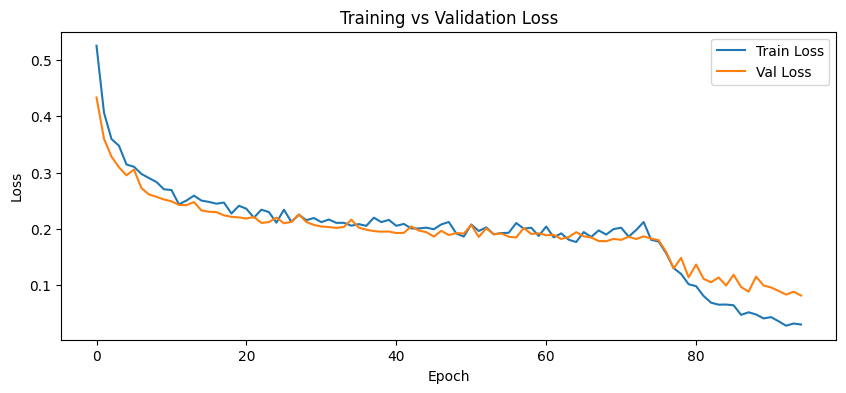

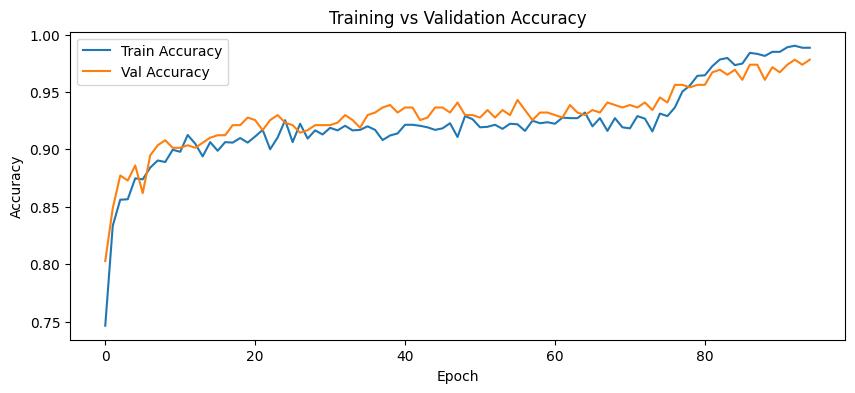

57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step - accuracy: 0.9827 - auc: 0.4804 - loss: 0.0540

Test Loss: 0.0832
Test Accuracy: 0.9757
Test AUC: 0.9936



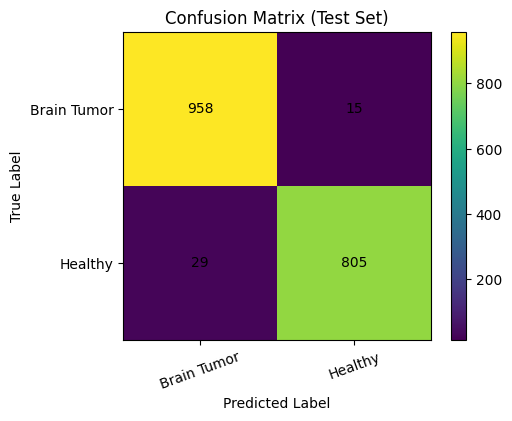

Classification Report (Test Set):
              precision    recall  f1-score   support

 Brain Tumor       0.97      0.98      0.98       973
     Healthy       0.98      0.97      0.97       834

    accuracy                           0.98      1807
   macro avg       0.98      0.97      0.98      1807
weighted avg       0.98      0.98      0.98      1807



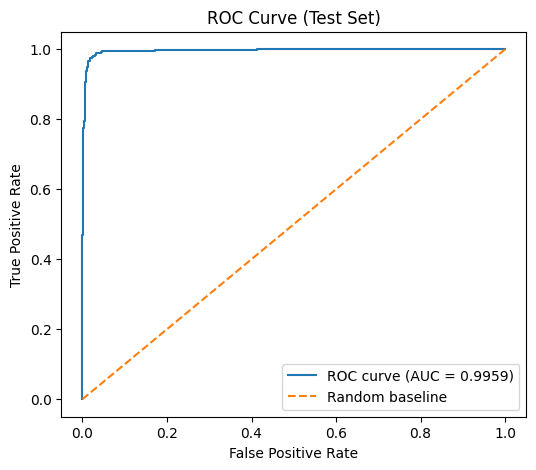

/tmp/ipython-input-1117357799.py:320: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = int(labels[0].numpy())
/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


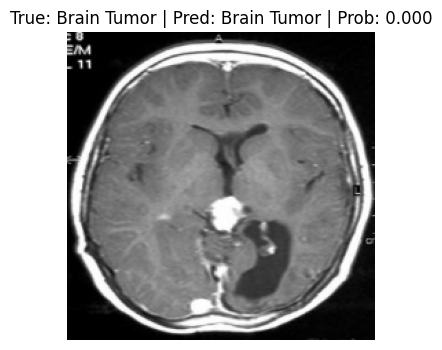

In [55]:
# ============================================================
# Brain Tumor Classification (Tumor vs Healthy) using Xception
# Pretrained on ImageNet (Transfer Learning + Fine-Tuning)
# - Google Drive dataset
# - Train/Val/Test split using folder structure:
#   BASE_DIR/
#     train/Brain Tumor/...
#     train/Healthy/...
#     val/Brain Tumor/...
#     val/Healthy/...
#     test/Brain Tumor/...
#     test/Healthy/...
# - 100 epochs + EarlyStopping(patience=6)
# - Adam optimizer
# - Save base model + full model as .h5
# - Plots: loss/accuracy curves
# - Evaluation: confusion matrix, classification report, ROC/AUC
# - One example prediction from test set
# ============================================================

# -------------------- Imports --------------------
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# NOTE: Do not use seaborn (kept pure matplotlib for plots).
# If you really want seaborn heatmap, you can add it later.

# -------------------- Mount Google Drive --------------------
from google.colab import drive
drive.mount("/content/drive")

# -------------------- Configuration --------------------
BASE_DIR = "/content/drive/MyDrive/DATASETS/brain-random-dataset"  # change if needed

TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR   = os.path.join(BASE_DIR, "val")
TEST_DIR  = os.path.join(BASE_DIR, "test")

IMG_SIZE = (224, 224)   # Xception expects 224x224
BATCH_SIZE = 32
EPOCHS = 100
PATIENCE = 6
SEED = 42

# Fine-tuning config
DO_FINE_TUNE = True
FINE_TUNE_LAYERS = 30         # unfreeze last N layers of Xception
HEAD_LR = 1e-3
FINE_TUNE_LR = 1e-5
FINE_TUNE_EPOCHS = 20         # additional epochs after head training

# Model save paths (Drive)
SAVE_DIR = "/content/drive/MyDrive/DATASETS/model-saved/random-save"
os.makedirs(SAVE_DIR, exist_ok=True)
BASE_MODEL_H5 = os.path.join(SAVE_DIR, "xception_base_model.h5")
FULL_MODEL_H5 = os.path.join(SAVE_DIR, "xception_full_model.h5")
BEST_MODEL_H5 = os.path.join(SAVE_DIR, "xception_best_model.h5")

# -------------------- Safety Checks --------------------
for d in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    if not os.path.isdir(d):
        raise FileNotFoundError(
            f"Missing folder: {d}\n\n"
            "Expected structure:\n"
            "BASE_DIR/train/<class_name>/...\n"
            "BASE_DIR/val/<class_name>/...\n"
            "BASE_DIR/test/<class_name>/...\n"
        )

# -------------------- Load Datasets --------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"  # returns labels as 0/1
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False  # IMPORTANT for correct ROC/CM alignment
)

class_names = train_ds.class_names
print("Class names:", class_names)
# Example: ['Brain Tumor', 'Healthy'] or ['Healthy', 'Brain Tumor']
# We'll respect this order everywhere.

# -------------------- Performance: Cache/Prefetch --------------------
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1000, seed=SEED).prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# -------------------- Data Augmentation --------------------
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.10),
        layers.RandomZoom(0.15),
        layers.RandomContrast(0.10),
    ],
    name="data_augmentation"
)

# Xception preprocess (ImageNet)
preprocess_input = tf.keras.applications.xception.preprocess_input

# -------------------- Build Model --------------------
base_model = tf.keras.applications.Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

# Freeze base model for the first stage (train only the head)
base_model.trainable = False

inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs, name="xception_brain_tumor")

# -------------------- Compile (Stage 1: Train Head) --------------------
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=HEAD_LR),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc")
    ]
)

model.summary()

# -------------------- Callbacks --------------------
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=PATIENCE,
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=BEST_MODEL_H5,
        monitor="val_loss",
        save_best_only=True
    )
]

# -------------------- Train (Stage 1) --------------------
history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# -------------------- Fine-Tuning (Stage 2) --------------------
history_ft = None
if DO_FINE_TUNE:
    # Unfreeze last N layers (keep BatchNorm frozen for stability)
    base_model.trainable = True

    # Freeze all layers first
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze last N layers except BatchNorm
    for layer in base_model.layers[-FINE_TUNE_LAYERS:]:
        if isinstance(layer, layers.BatchNormalization):
            layer.trainable = False
        else:
            layer.trainable = True

    # Re-compile with a smaller learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=FINE_TUNE_LR),
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            tf.keras.metrics.AUC(name="auc")
        ]
    )

    print("\nStarting fine-tuning...\n")
    history_ft = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=FINE_TUNE_EPOCHS,
        callbacks=callbacks
    )

# -------------------- Save Models (.h5) --------------------
# Save base model (feature extractor) and full model (end-to-end classifier)
base_model.save(BASE_MODEL_H5)
model.save(FULL_MODEL_H5)
print(f"Saved base model: {BASE_MODEL_H5}")
print(f"Saved full model: {FULL_MODEL_H5}")
print(f"Best checkpoint (val_loss): {BEST_MODEL_H5}")

# -------------------- Combine History (for plotting) --------------------
def merge_histories(h1, h2):
    """Merge two Keras History objects (head + fine-tune) into one dict."""
    out = {}
    for k in h1.history.keys():
        out[k] = list(h1.history[k])
    if h2 is not None:
        for k in h2.history.keys():
            out[k].extend(list(h2.history[k]))
    return out

hist = merge_histories(history_head, history_ft)

# -------------------- Plot Training Curves --------------------
plt.figure(figsize=(10, 4))

# Loss
plt.plot(hist["loss"], label="Train Loss")
plt.plot(hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
# Accuracy
plt.plot(hist["accuracy"], label="Train Accuracy")
plt.plot(hist["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# -------------------- Evaluate on Test Set --------------------
test_loss, test_acc, test_auc = model.evaluate(test_ds, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}\n")

# -------------------- Predictions for Confusion Matrix / ROC --------------------
y_true = []
y_prob = []

for x_batch, y_batch in test_ds:
    probs = model.predict(x_batch, verbose=0).reshape(-1)
    y_prob.extend(probs.tolist())
    y_true.extend(y_batch.numpy().astype(int).reshape(-1).tolist())

y_true = np.array(y_true)
y_prob = np.array(y_prob)

# Default threshold (paper can also report best threshold using ROC if needed)
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# -------------------- Confusion Matrix --------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], class_names, rotation=20)
plt.yticks([0, 1], class_names)

# Put numbers in cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.colorbar()
plt.show()

print("Classification Report (Test Set):")
print(classification_report(y_true, y_pred, target_names=class_names))

# -------------------- ROC Curve --------------------
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend()
plt.show()

# -------------------- One Example Inference --------------------
# Take 1 batch from test set
for images, labels in test_ds.take(1):
    img = images[0]
    true_label = int(labels[0].numpy())

    prob = float(model.predict(tf.expand_dims(img, 0), verbose=0)[0][0])
    pred_label = int(prob >= threshold)

    plt.figure(figsize=(4, 4))
    plt.imshow(img.numpy().astype("uint8"))
    plt.title(
        f"True: {class_names[true_label]} | Pred: {class_names[pred_label]} | Prob: {prob:.3f}"
    )
    plt.axis("off")
    plt.show()
    break

